# Out of Vocabulary(OOV) (词典中没有改词时)

$ Pr(w\_0)  = constant < Pr(w\_1)  $

# Language Model: Smooth

# Search Policy

In [5]:
coordination_source = """
{name:'兰州', geoCoord:[103.73, 36.03]},
{name:'嘉峪关', geoCoord:[98.17, 39.47]},
{name:'西宁', geoCoord:[101.74, 36.56]},
{name:'成都', geoCoord:[104.06, 30.67]},
{name:'石家庄', geoCoord:[114.48, 38.03]},
{name:'拉萨', geoCoord:[102.73, 25.04]},
{name:'贵阳', geoCoord:[106.71, 26.57]},
{name:'武汉', geoCoord:[114.31, 30.52]},
{name:'郑州', geoCoord:[113.65, 34.76]},
{name:'济南', geoCoord:[117, 36.65]},
{name:'南京', geoCoord:[118.78, 32.04]},
{name:'合肥', geoCoord:[117.27, 31.86]},
{name:'杭州', geoCoord:[120.19, 30.26]},
{name:'南昌', geoCoord:[115.89, 28.68]},
{name:'福州', geoCoord:[119.3, 26.08]},
{name:'广州', geoCoord:[113.23, 23.16]},
{name:'长沙', geoCoord:[113, 28.21]},
//{name:'海口', geoCoord:[110.35, 20.02]},
{name:'沈阳', geoCoord:[123.38, 41.8]},
{name:'长春', geoCoord:[125.35, 43.88]},
{name:'哈尔滨', geoCoord:[126.63, 45.75]},
{name:'太原', geoCoord:[112.53, 37.87]},
{name:'西安', geoCoord:[108.95, 34.27]},
//{name:'台湾', geoCoord:[121.30, 25.03]},
{name:'北京', geoCoord:[116.46, 39.92]},
{name:'上海', geoCoord:[121.48, 31.22]},
{name:'重庆', geoCoord:[106.54, 29.59]},
{name:'天津', geoCoord:[117.2, 39.13]},
{name:'呼和浩特', geoCoord:[111.65, 40.82]},
{name:'南宁', geoCoord:[108.33, 22.84]},
//{name:'西藏', geoCoord:[91.11, 29.97]},
{name:'银川', geoCoord:[106.27, 38.47]},
{name:'乌鲁木齐', geoCoord:[87.68, 43.77]},
{name:'香港', geoCoord:[114.17, 22.28]},
{name:'澳门', geoCoord:[113.54, 22.19]}
"""

In [6]:
import re

In [7]:
pattern = re.compile(r"name:'(\w+)',\s+geoCoord:\[(\d+.\d+),\s(\d+.\d+)\]")

In [8]:
city_location = {}

In [9]:
for line in coordination_source.split('\n'):
    city_info = pattern.findall(line)
    if not city_info: continue
    
    # following: we find the city info
    
    city, long, lat = city_info[0]
    
    long, lat = float(long), float(lat)
    
    city_location[city] = (long, lat)

In [10]:
city_location

{'兰州': (103.73, 36.03),
 '嘉峪关': (98.17, 39.47),
 '西宁': (101.74, 36.56),
 '成都': (104.06, 30.67),
 '石家庄': (114.48, 38.03),
 '拉萨': (102.73, 25.04),
 '贵阳': (106.71, 26.57),
 '武汉': (114.31, 30.52),
 '郑州': (113.65, 34.76),
 '济南': (117.0, 36.65),
 '南京': (118.78, 32.04),
 '合肥': (117.27, 31.86),
 '杭州': (120.19, 30.26),
 '南昌': (115.89, 28.68),
 '福州': (119.3, 26.08),
 '广州': (113.23, 23.16),
 '长沙': (113.0, 28.21),
 '海口': (110.35, 20.02),
 '沈阳': (123.38, 41.8),
 '长春': (125.35, 43.88),
 '哈尔滨': (126.63, 45.75),
 '太原': (112.53, 37.87),
 '西安': (108.95, 34.27),
 '台湾': (121.3, 25.03),
 '北京': (116.46, 39.92),
 '上海': (121.48, 31.22),
 '重庆': (106.54, 29.59),
 '天津': (117.2, 39.13),
 '呼和浩特': (111.65, 40.82),
 '南宁': (108.33, 22.84),
 '西藏': (91.11, 29.97),
 '银川': (106.27, 38.47),
 '乌鲁木齐': (87.68, 43.77),
 '香港': (114.17, 22.28),
 '澳门': (113.54, 22.19)}

In [11]:
import math

In [12]:
def geo_distance(origin, destination):
    """
    Calculate the Haversine distance.

    Parameters
    ----------
    origin : tuple of float
        (lat, long)
    destination : tuple of float
        (lat, long)

    Returns
    -------
    distance_in_km : float

    Examples
    --------
    >>> origin = (48.1372, 11.5756)  # Munich
    >>> destination = (52.5186, 13.4083)  # Berlin
    >>> round(distance(origin, destination), 1)
    504.2
    """
    lat1, lon1 = origin
    lat2, lon2 = destination
    radius = 6371  # km

    dlat = math.radians(lat2 - lat1)
    dlon = math.radians(lon2 - lon1)
    a = (math.sin(dlat / 2) * math.sin(dlat / 2) +
         math.cos(math.radians(lat1)) * math.cos(math.radians(lat2)) *
         math.sin(dlon / 2) * math.sin(dlon / 2))
    c = 2 * math.atan2(math.sqrt(a), math.sqrt(1 - a))
    d = radius * c

    return d

In [13]:
def get_city_distance(city1, city2):
    return geo_distance(city_location[city1], city_location[city2])

In [14]:
get_city_distance('杭州', '上海')

153.5185697155768

In [15]:
import networkx as nx

In [16]:
cities = list(city_location.keys())

In [17]:
city_graph = nx.Graph()

In [18]:
city_graph.add_nodes_from(cities)

In [20]:
%matplotlib inline

In [60]:
import matplotlib.pyplot as plt

In [63]:
import matplotlib
a=sorted([f.name for f in matplotlib.font_manager.fontManager.ttflist])
 
for i in a:
    print (i)

.Keyboard
.LastResort
.SF Compact Display
.SF Compact Display
.SF Compact Display
.SF Compact Display
.SF Compact Display
.SF Compact Display
.SF Compact Display
.SF Compact Display
.SF Compact Display
.SF Compact Rounded
.SF Compact Rounded
.SF Compact Rounded
.SF Compact Rounded
.SF Compact Rounded
.SF Compact Rounded
.SF Compact Rounded
.SF Compact Rounded
.SF Compact Rounded
.SF Compact Text
.SF Compact Text
.SF Compact Text
.SF Compact Text
.SF Compact Text
.SF Compact Text
.SF Compact Text
.SF Compact Text
.SF Compact Text
.SF Compact Text
.SF Compact Text
.SF Compact Text
.SF NS Display Condensed
.SF NS Display Condensed
.SF NS Display Condensed
.SF NS Display Condensed
.SF NS Display Condensed
.SF NS Display Condensed
.SF NS Display Condensed
.SF NS Display Condensed
.SF NS Display Condensed
.SF NS Rounded
.SF NS Rounded
.SF NS Rounded
.SF NS Rounded
.SF NS Rounded
.SF NS Rounded
.SF NS Rounded
.SF NS Rounded
.SF NS Rounded
.SF NS Symbols
.SF NS Symbols
.SF NS Symbols
.SF NS Sy

In [71]:
plt.rcParams['font.sans-serif']=['Adobe Song Std']
plt.rcParams['axes.unicode_minus'] = False #解决符号问题

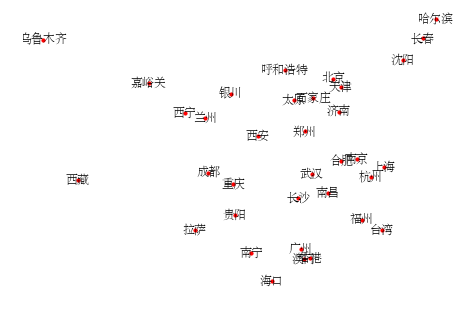

In [72]:
nx.draw(city_graph, city_location, with_labels=True, node_size=10)

In [73]:
threshold = 700

In [74]:
from collections import defaultdict

In [75]:
cities_connection = defaultdict(list)

In [76]:
for c1 in cities: #城市两两之间的路径
    for c2 in cities:
        if c1 == c2: continue
        
        if get_city_distance(c1, c2) < threshold: 
            cities_connection[c1].append(c2)

In [77]:
cities_connection['兰州']

['嘉峪关', '西宁', '成都', '拉萨', '贵阳', '西安', '重庆', '南宁', '银川']

In [85]:
cities_connection

defaultdict(list,
            {'兰州': ['嘉峪关', '西宁', '成都', '拉萨', '贵阳', '西安', '重庆', '南宁', '银川'],
             '嘉峪关': ['兰州', '西宁', '成都', '拉萨'],
             '西宁': ['兰州', '嘉峪关', '成都', '拉萨', '贵阳', '重庆', '银川'],
             '成都': ['兰州', '嘉峪关', '西宁', '拉萨', '贵阳', '西安', '重庆', '南宁', '银川'],
             '石家庄': ['武汉',
              '郑州',
              '济南',
              '南京',
              '合肥',
              '南昌',
              '广州',
              '长沙',
              '太原',
              '西安',
              '北京',
              '天津',
              '呼和浩特'],
             '拉萨': ['兰州', '嘉峪关', '西宁', '成都', '贵阳', '重庆', '南宁', '银川'],
             '贵阳': ['兰州', '西宁', '成都', '拉萨', '海口', '西安', '重庆', '南宁', '银川'],
             '武汉': ['石家庄',
              '郑州',
              '济南',
              '南京',
              '合肥',
              '杭州',
              '南昌',
              '福州',
              '广州',
              '长沙',
              '海口',
              '太原',
              '西安',
              '北京',
              '天津'

In [78]:
cities_connection_graph = nx.Graph(cities_connection)

/anaconda3/lib/python3.7/site-packages/networkx/drawing/nx_pylab.py:611: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):


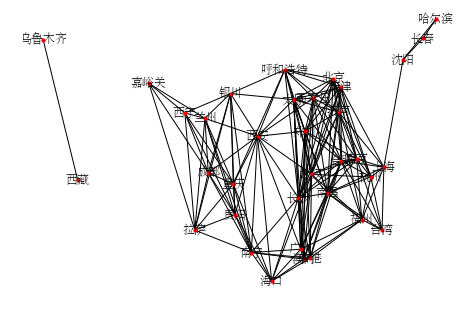

In [79]:
nx.draw(cities_connection_graph, city_location, with_labels=True, node_size=10)

In [80]:
def is_goal(desitination):
    def _wrap(current_path):
        return current_path[-1] == desitination
    return _wrap

In [92]:
def search(graph, start, is_goal, search_strategy): #广度优先搜索
    pathes = [[start] ]
    seen = set()
    
    while pathes:
        path = pathes.pop(0)
        froniter = path[-1]
        
        if froniter in seen: continue
            
        successors = graph[froniter]
        
        for city in successors: 
            if city in path: continue
            
            new_path = path+[city]
            
            pathes.append(new_path)
        
            if is_goal(new_path): return new_path
#        print('len(pathes)={}'.format(pathes))
        seen.add(froniter)
        pathes = search_strategy(pathes)

In [87]:
search(cities_connection, start='西安', is_goal=is_goal('上海'), search_strategy=lambda n: n)

['西安', '石家庄', '济南', '上海']

In [88]:
def sort_path(cmp_func, beam=-1):
    def _sorted(pathes):
        return sorted(pathes, key=cmp_func)[:beam]
    return _sorted

In [89]:
search(cities_connection, start='北京', is_goal=is_goal('拉萨'), search_strategy=lambda n: n)

['北京', '长沙', '南宁', '拉萨']

In [91]:
search(cities_connection, start='北京', is_goal=is_goal('拉萨'), search_strategy=sort_path(lambda n: n))

['北京', '南京', '上海', '南昌', '台湾', '合肥', '天津', '呼和浩特', '太原', '广州', '南宁', '拉萨']